# Capacity Installed EDA

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()
# Get the directory of the current script
parent_dir = os.path.dirname(current_dir)
# Construct the path to the xdrive folder
xdrive_path = os.path.join(parent_dir, 'xdrive')
# Add the xdrive path to sys.path
sys.path.append(xdrive_path)

# Now you can import your module from xdrive
import get_files_from_xdrive as gxdrive

df_wind_generation = gxdrive.read_file_from_xdrive_as_df('CapacityInstalledDaily_Cleaned.csv')


In [63]:
# Ensure DateTime column is in datetime format
df_wind_generation['DateTime'] = pd.to_datetime(df_wind_generation['DateTime'])

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
capacity_columns = [col for col in df_wind_generation.columns if not col.startswith('Total')]


# Add the 'Year' column if it does not already exist
if 'Year' not in df_wind_generation.columns:
    df_wind_generation['Year'] = df_wind_generation['DateTime'].dt.year

# Filter out columns starting with "Total"
capacity_columns = [col for col in df_wind_generation.columns if not col.startswith('Total')]
columns_to_keep = [col for col in df_wind_generation.columns if not col.startswith('Total') and col != 'Year' and col != 'DateTime']

grouped_by_year = df_wind_generation.groupby('Year')[columns_to_keep].sum(numeric_only=True)



<Figure size 1000x600 with 0 Axes>

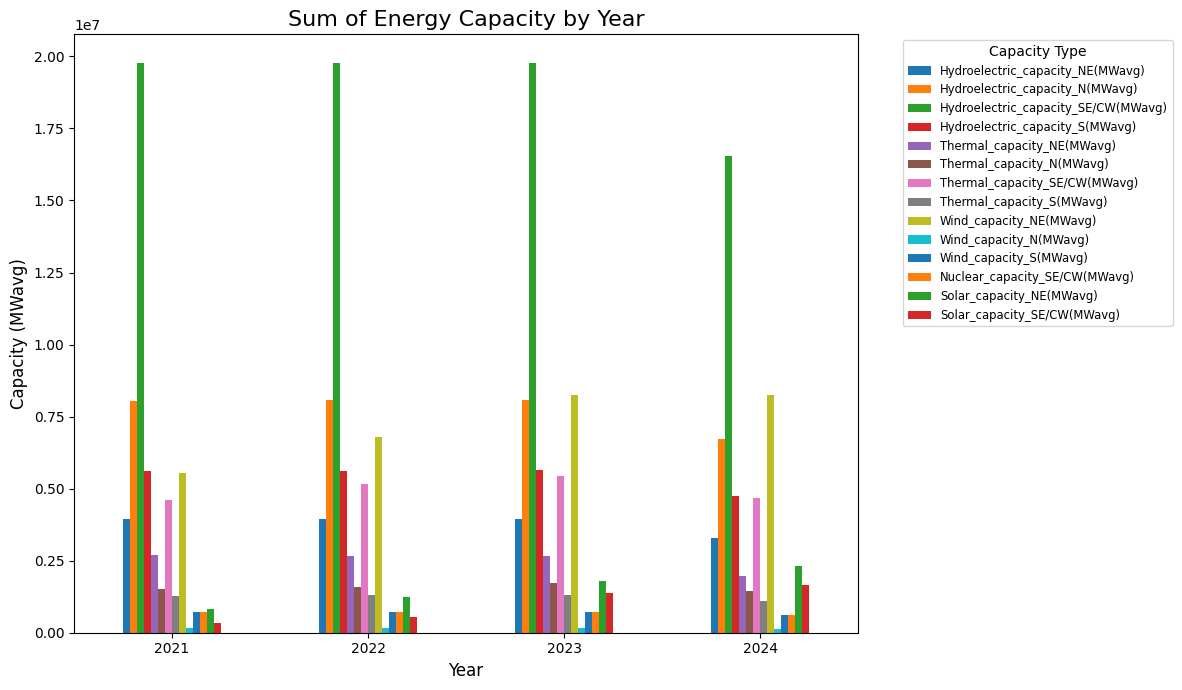

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the grouped data
plt.figure(figsize=(10, 6))

# Plot using seaborn to create a barplot for each column
grouped_by_year.plot(kind='bar', stacked=False, figsize=(12, 7))

# Customize the plot
plt.title('Sum of Energy Capacity by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Capacity (MWavg)', fontsize=12)
plt.xticks(rotation=0)  # Keeps the x-axis labels horizontal
plt.legend(title='Capacity Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Show the plot
plt.tight_layout()
plt.show()


Energy Type Distribution over time

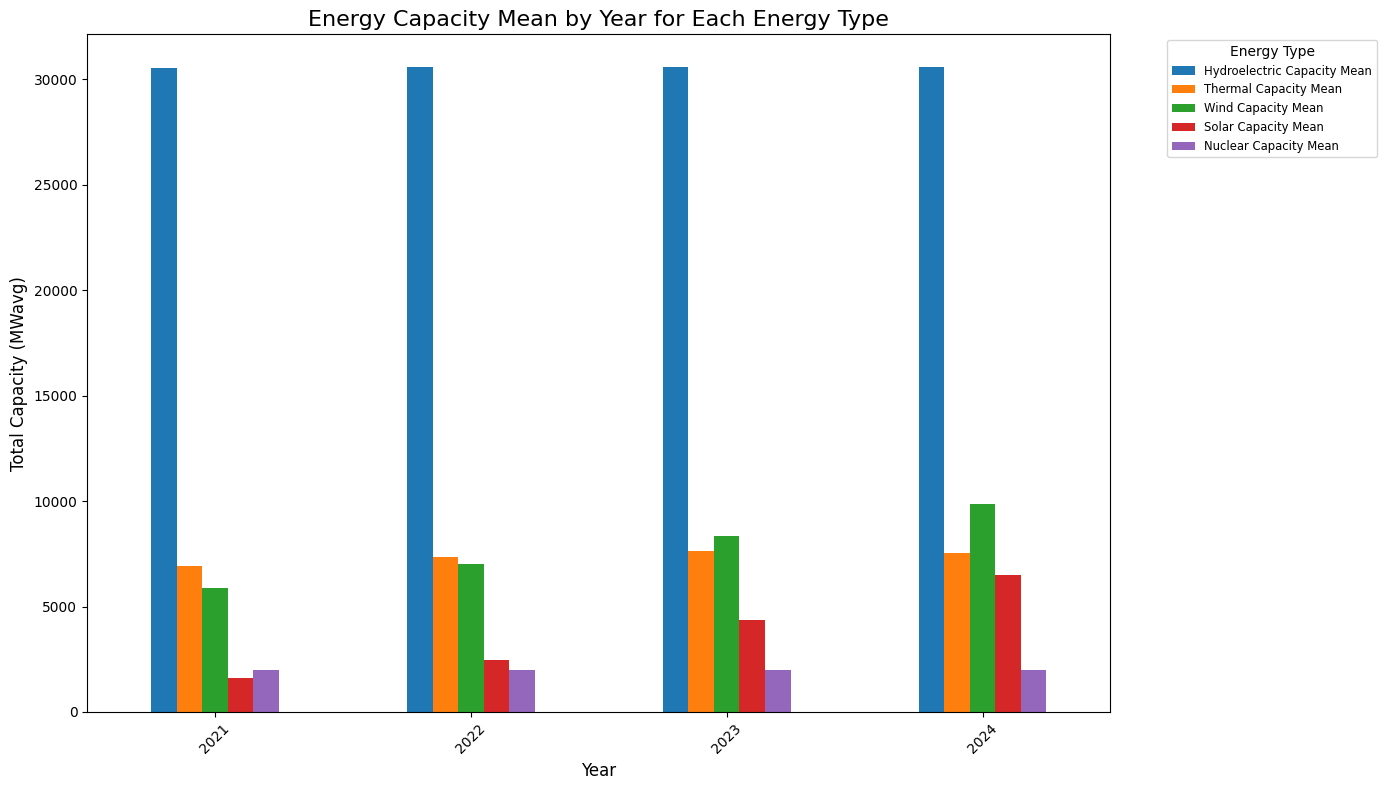

In [69]:
# Convert columns to numeric, if necessary
for column in columns_to_keep:
    df_wind_generation[column] = pd.to_numeric(df_wind_generation[column], errors='coerce')

# Recalculate the sum
df_wind_generation['Solar Capacity Mean'] = df_wind_generation[['Solar_capacity_NE(MWavg)', 'Solar_capacity_SE/CW(MWavg)']].sum(axis=1)


# Sum the related energy type columns (Hydroelectric, Thermal, Wind, Solar, etc.)
df_wind_generation['Hydroelectric Capacity Mean'] = df_wind_generation[['Hydroelectric_capacity_N(MWavg)',
                                       'Hydroelectric_capacity_SE/CW(MWavg)',
                                       'Hydroelectric_capacity_S(MWavg)']].mean(axis=1)

df_wind_generation['Thermal Capacity Mean'] = df_wind_generation[['Thermal_capacity_NE(MWavg)',
                                  'Thermal_capacity_N(MWavg)',
                                  'Thermal_capacity_SE/CW(MWavg)',
                                  'Thermal_capacity_S(MWavg)']].mean(axis=1)

df_wind_generation['Wind Capacity Mean'] = df_wind_generation[['Wind_capacity_NE(MWavg)',
                               'Wind_capacity_N(MWavg)',
                               'Wind_capacity_S(MWavg)']].mean(axis=1)

df_wind_generation['Solar Capacity Mean'] = df_wind_generation[['Solar_capacity_NE(MWavg)',
                                'Solar_capacity_SE/CW(MWavg)']].mean(axis=1)

df_wind_generation['Nuclear Capacity Mean'] = df_wind_generation['Nuclear_capacity_SE/CW(MWavg)']  # If there is only one column for nuclear



# Remove the original columns and only keep the summed columns for plotting
df_summed = df_wind_generation[['DateTime', 'Year', 'Hydroelectric Capacity Mean',
                'Thermal Capacity Mean', 'Wind Capacity Mean',
                'Solar Capacity Mean', 'Nuclear Capacity Mean']]

# Group by Year and sum across the energy types
df_grouped = df_summed.groupby('Year').mean(numeric_only=True)

# Plot the results as a bar plot
df_grouped.plot(kind='bar', figsize=(14, 8), stacked=False)

# Customize the plot
plt.title('Energy Capacity Mean by Year for Each Energy Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Capacity (MWavg)', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, shapiro, anderson, normaltest, chi2_contingency


X_train = df_wind_generation.filter(like='capacity', axis=1)

# Number of columns to visualize
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
num_cols = len(numeric_columns)

# Set up grid size
grid_cols = 4  # Adjust to control the number of columns in the grid
grid_rows = (num_cols + grid_cols - 1) // grid_cols  # Calculate rows needed

# Create the grid for histograms
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, grid_rows * 4))
axes = axes.flatten()  # Flatten to easily iterate over

for i, column in enumerate(numeric_columns):
    sns.histplot(X_train[column], kde=True, ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots if the grid is larger than the number of columns
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'split_test_and_train'